# Classificateur Bayésien : Les iris

In [1]:
import numpy as np
import math
import seaborn as sns
import pandas as pd

In [2]:
from sklearn import datasets

iris = datasets.load_iris()


### Division de l'échantillon d'apprentissage

Les données étant triées par classe, il faut tout d'abord les mélanger 

In [3]:
Ciris = np.c_[iris.data.reshape(len(iris.data), -1), iris.target.reshape(len(iris.target), -1)]

np.random.shuffle(Ciris)
shuffledIrisData = Ciris[ :, :iris.data.size//len(iris.data)].reshape(iris.data.shape)
shuffledIrisTarget = Ciris[ :, iris.data.size//len(iris.data) :].reshape(iris.target.shape)

Le Corpus doit être séparé en trois parties:
- l'Apprentissage : 100 valeurs
- Le Dev : 30 valeurs
- le Test : 20 valeurs

In [4]:
appIrisData = shuffledIrisData[0:100]
appIrisTarget = shuffledIrisTarget[0:100]
devIrisData = shuffledIrisData[100:130]
devIrisTarget = shuffledIrisTarget[100:130]
testIrisData = shuffledIrisData[130:150]
testIrisTarget = shuffledIrisTarget[130:150]

### Phase d'apprentissage

Probabilité apriori :

<span>$ \frac{Effectif}{EffectifTotal} $</span>

Soit les différentes classes d'iris:
- Setosa noté 0
- Versicolor noté 1
- Virginica noté 2

In [5]:
pSetosa = np.count_nonzero(appIrisTarget == 0)/100
pVersicolor = np.count_nonzero(appIrisTarget == 1)/100
pVirginica = np.count_nonzero(appIrisTarget == 2)/100
print ("Probabilité Virginica = " +str(pVirginica))
print ("Probabilité Versicolor = " +str(pVersicolor))
print ("Probabilité Setosa = " +str(pSetosa))


Probabilité Virginica = 0.33
Probabilité Versicolor = 0.31
Probabilité Setosa = 0.36


In [6]:
listSetosa = []
listVersicolor = []
listVirginica = []
for index,value in enumerate(appIrisTarget):
    if value == 0:
        listSetosa.append([appIrisData[index][0],appIrisData[index][1]])
    elif value == 1:
        listVersicolor.append([appIrisData[index][0],appIrisData[index][1]])
    elif value == 2:
        listVirginica.append([appIrisData[index][0],appIrisData[index][1]])
arraySetosa=np.array(listSetosa)
arrayVersicolor = np.array(listVersicolor)
arrayVirginica = np.array(listVirginica)

moySetosa = np.mean(arraySetosa, axis=0)
moyVersicolor = np.mean(arrayVersicolor, axis=0)
moyVirginica = np.mean(arrayVirginica, axis=0)

covSetosa = np.cov(arraySetosa.T)
covVersicolor = np.cov(arrayVersicolor.T)
covVirginica = np.cov(arrayVirginica.T)


Calcul des vraisemblances
Avec n nombre de valeurs du corpus, $\sum$ matrice de variance-covariance et x corpus utilisé

<span> $ p(x) = \frac{1}{(2*\pi)^\frac{n}{2}*\sqrt|\sum|}*exp^{\frac{-1}{2}*((x-\mu){}^t . \sum {}^-1 . (x-\mu))}  $ </span>

In [7]:
def f(x,cov,moy,length):
    return (1/((2*np.pi)**(length/2)*np.sqrt(np.linalg.det(cov)))*np.exp((-1/2)*((x-moy)).dot(np.linalg.inv(cov)).dot((x-moy).T)))

Les valeurs ont l'air très mélangées. Il faut tester avec les deux autres valeurs

# Phase de Développement

### Test avec 2 éléments

In [8]:
scorelist = []
for i in range(0,4):
    for j in range(0,4):
        if i<j:
            listSetosa2 = []
            listVersicolor2 = []
            listVirginica2 = []
            for index,value in enumerate(appIrisTarget):
                if value == 0:
                    listSetosa2.append([appIrisData[index][i],appIrisData[index][j]])
                elif value == 1:
                    listVersicolor2.append([appIrisData[index][i],appIrisData[index][j]])
                elif value == 2:
                    listVirginica2.append([appIrisData[index][i],appIrisData[index][j]])
            arraySetosa2=np.array(listSetosa2)
            arrayVersicolor2 = np.array(listVersicolor2)
            arrayVirginica2 = np.array(listVirginica2)

            moySetosa2 = np.mean(arraySetosa2, axis=0)
            moyVersicolor2 = np.mean(arrayVersicolor2, axis=0)
            moyVirginica2 = np.mean(arrayVirginica2, axis=0)

            covSetosa2 = np.cov(arraySetosa2.T)
            covVersicolor2 = np.cov(arrayVersicolor2.T)
            covVirginica2 = np.cov(arrayVirginica2.T)

            listIris2 = []
            for value in devIrisData:
                listIris2.append([value[i],value[j]])
            arrayIris2 = np.array(listIris2)    
            listRes2 = []
            for x in arrayIris2:
                ppVirginica2 = f(np.array([x]),covVirginica2,moyVirginica2,len(arrayIris2))*pVirginica
                ppVersicolor2 = f(np.array([x]),covVersicolor2,moyVersicolor2,len(arrayIris2))*pVersicolor
                ppSetosa2 = f(np.array([x]),covSetosa2,moySetosa2,len(arrayIris2))*pSetosa
                res2 = [ppSetosa2,ppVersicolor2,ppVirginica2].index(max([ppSetosa2,ppVersicolor2,ppVirginica2]))

                listRes2.append(res2)
            score = 0    
            for index,value in enumerate(listRes2):
                if value == devIrisTarget[index]:
                    score+=1

            scorelist.append(((i,j),score))

print("Liste des scores de combinaison de 2 éléments")
print(scorelist)

Liste des scores de combinaison de 2 éléments
[((0, 1), 24), ((0, 2), 27), ((0, 3), 29), ((1, 2), 26), ((1, 3), 27), ((2, 3), 29)]


### Test avec 4 élements

On teste avec tout les éléments, ce qui semble, à priori la meilleur solution.

In [9]:
listSetosa2 = []
listVersicolor2 = []
listVirginica2 = []
for index,value in enumerate(devIrisTarget):
    if value == 0:
        listSetosa2.append([devIrisData[index][0],devIrisData[index][1],devIrisData[index][2],devIrisData[index][3]])
    elif value == 1:
        listVersicolor2.append([devIrisData[index][0],devIrisData[index][1],devIrisData[index][2],devIrisData[index][3]])
    elif value == 2:
        listVirginica2.append([devIrisData[index][0],devIrisData[index][1],devIrisData[index][2],devIrisData[index][3]])
arraySetosa2=np.array(listSetosa2)
arrayVersicolor2 = np.array(listVersicolor2)
arrayVirginica2 = np.array(listVirginica2)

moySetosa2 = np.mean(arraySetosa2, axis=0)
moyVersicolor2 = np.mean(arrayVersicolor2, axis=0)
moyVirginica2 = np.mean(arrayVirginica2, axis=0)

covSetosa2 = np.cov(arraySetosa2.T)
covVersicolor2 = np.cov(arrayVersicolor2.T)
covVirginica2 = np.cov(arrayVirginica2.T)

listIris2 = []
for value in devIrisData:
    listIris2.append([value[0],value[1],value[2],value[3]])
arrayIris2 = np.array(listIris2)    
listRes2 = []

for x in arrayIris2:
    ppVirginica2 = f(np.array([x]),covVirginica2,moyVirginica2,len(arrayIris2))*pVirginica
    ppVersicolor2 = f(np.array([x]),covVersicolor2,moyVersicolor2,len(arrayIris2))*pVersicolor
    ppSetosa2 = f(np.array([x]),covSetosa2,moySetosa2,len(arrayIris2))*pSetosa
    res2 = [ppSetosa2,ppVersicolor2,ppVirginica2].index(max([ppSetosa2,ppVersicolor2,ppVirginica2]))

    listRes2.append(res2)
score = 0    
for index,value in enumerate(listRes2):
    if value == devIrisTarget[index]:
        score+=1

print("Score pour 4 éléments : "+str(score)+"/"+str(len(listRes2)))

Score pour 4 éléments : 29/30


# Phase d'Evaluation:

La meilleur solution, et donc celle que l'on evaluera est celle à 4 éléments. On utilise la moyenne et la matrice de variance covarience trouvée précédemment.

In [10]:
listSetosa3 = []
listVersicolor3 = []
listVirginica3 = []
for index,value in enumerate(testIrisTarget):
    if value == 0:
        listSetosa3.append([testIrisData[index][0],testIrisData[index][1],testIrisData[index][2],testIrisData[index][3]])
    elif value == 1:
        listVersicolor3.append([testIrisData[index][0],testIrisData[index][1],testIrisData[index][2],testIrisData[index][3]])
    elif value == 2:
        listVirginica3.append([testIrisData[index][0],testIrisData[index][1],testIrisData[index][2],testIrisData[index][3]])
arraySetosa3=np.array(listSetosa3)
arrayVersicolor3 = np.array(listVersicolor3)
arrayVirginica3 = np.array(listVirginica3)

listIris3 = []
for value in testIrisData:
    listIris3.append([value[0],value[1],value[2],value[3]])
arrayIris3 = np.array(listIris3)    
listRes3 = []
for x in arrayIris3:
    ppVirginica3 = f(np.array([x]),covVirginica2,moyVirginica2,len(arrayIris3))*pVirginica
    ppVersicolor3 = f(np.array([x]),covVersicolor2,moyVersicolor2,len(arrayIris3))*pVersicolor
    ppSetosa3 = f(np.array([x]),covSetosa2,moySetosa2,len(arrayIris3))*pSetosa
    res3 = [ppSetosa3,ppVersicolor3,ppVirginica3].index(max([ppSetosa3,ppVersicolor3,ppVirginica3]))

    listRes3.append(res3)
score = 0
print("Prédit,réel")
confusion = [[0,0,0],[0,0,0],[0,0,0]]
for index,value in enumerate(listRes3):
    
    if value == testIrisTarget[index]:
        confusion[value][value]+=1
        print(testIrisTarget[index]," ",value)
        score += 1
    else :
        confusion[int(testIrisTarget[index])][value]+=1
        print(testIrisTarget[index]," ",value," Error")
print("Score = ",score,"/",len(listRes3))

Prédit,réel
0.0   0
0.0   0
2.0   2
1.0   1
0.0   0
2.0   2
2.0   2
2.0   2
1.0   1
0.0   0
2.0   2
2.0   2
1.0   1
2.0   2
2.0   2
2.0   2
0.0   0
1.0   1
1.0   1
0.0   0
Score =  20 / 20


Affichage de la matrice de confusion calculée au dessus.

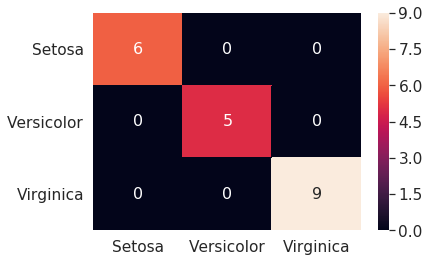

In [11]:
matrice_confusion = pd.DataFrame(confusion, ["Setosa","Versicolor","Virginica"],
                  ["Setosa","Versicolor","Virginica"])
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(matrice_confusion, annot=True,annot_kws={"size": 16})

### Calcul Rappel,Precision

<span>$ rappel_i = \frac{nb\ instances\ correctement\ classées\ i}{nb\ instances\ réellement\ i} $ </span>

<span>$ rappel = \frac{\sum_i\ rappel_i}{nombre\ de\ classes}$ </span>

<span>$ precision_i = \frac{nb\ instances\ correctement\ classées\ i}{nb\ instances\ classée\ i} $ </span>

<span>$ precision = \frac{\sum_i\ precision_i}{nombre\ de\ classes}$ </span>

In [12]:
precisionVersicolor = confusion[1][1]/(confusion[1][0]+confusion[1][1]+confusion[1][2])
precisionSetosa = confusion[0][0]/(confusion[0][0]+confusion[0][1]+confusion[0][2])
precisionVirginica = confusion[2][2]/(confusion[2][0]+confusion[2][1]+confusion[2][2])

precision = (precisionVersicolor + precisionSetosa + precisionVirginica)/3
print("Precision = " + str(precision))

rappelVersicolor = confusion[1][1]/(confusion[1][1]+confusion[2][1]+confusion[0][1])
rappelSetosa = confusion[0][0]/(confusion[0][0]+confusion[1][0]+confusion[2][0])
rappelVirginica = confusion[2][2]/(confusion[0][2]+confusion[1][2]+confusion[2][2])

rappel = (rappelVersicolor + rappelSetosa + rappelVirginica)/3
print("Rappel = " + str(rappel))
beta = 1
fmesure = ((1 + beta**2)* rappel * precision)/(beta**2*(rappel+precision))
print("F-mesure = " + str(fmesure))

Precision = 1.0
Rappel = 1.0
F-mesure = 1.0
